<a href="https://colab.research.google.com/github/Gazaleh/MathBio/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instructions**:
* Due at the start of class **Friday March 22nd** (12:50pm), with a zero-penalty extension to **Tuesday March 26th** 5pm.
* Submit assignments on Canvas, email (park.y@ufl.edu), or in person. You may take pictures of written work and submit electronically. Be sure to submit Colab links (if any) electronically. Do not modify the Colab notebook after submission.
* If using Colab, create a shared link using the option "**for anyone with the link**" and switch permission from **Viewer** to **Editor**, so that it says "Anyone on the internet with the link can edit".
  * I will only request permission once. Once the notebook has been shared, the version history must show that no edits were made after the deadline.

# For all solutions:
* All plots should include axis labels.
* Briefly mention collaborators and sources (e.g., "I worked with John Doe and used Stackoverflow")
* You may use and modify all code provided in class.
* You may use any formula related to the steady-state distribution discussed in class (hint: some formulas are much simpler to program than others).
* You may use all available methods in numpy, scipy, and matplotlib. **I encourage you to use Google**.

# Problem 1A

Write code to compute the following:

1. The steady-state distribution of the birth-death process
2. Mean first passage times of the birth-death process, where the maximum population $N$ is an absorbing state.

Assumptions:
* The birth rate at zero population should be nonzero (you may pick $b_0=1$ for simplicity, but any $b_0>0$ will do).
* You may use the code provided in class [here](https://colab.research.google.com/drive/16UcBdieipGyXvYUsz_anGv2F0_V1q7f6#scrollTo=8nG47nHrQ-oj), but modify the code as needed so that $b_0>0$ and $d_N$ is appropriately chosen.
* Take the maximum number of states to be $N=20$ (it may help to check your matrix for a small number like $N=5$ before increasing its size).

A complete solution consists of the following:
* A brief one- or two-sentence explanation of how $b_0>0$ could be biologically realistic.
* The code showing how you constructed your transition probability matrix.
* A plot of the steady-state distribution (states on the x-axis and probability on the y-axis).
* A plot of the mean first passage times (states on the x-axis and times on the y-axis).
* A brief summary for each plot explaining what is shown as if you were explaining the figure to a math or physics major who hasn't taken the class before.

Hint:
* For $N=5$ I calculated the following mean first passage times:
`[69.16666667, 68.16666667, 57.16666667, 41.16666667, 21.83333333]`

# Problem 1B

Modify the death rate so that $d_i = \frac{i}{10N}$ for $i\neq 0,N$ while keeping all other birth and death rates the same. Calculate the mean first passage time to reach the maximum population.

A complete solution consists of the following:
* A plot of the new mean first passage times plotted on top of the previous mean first passage times.
* A few sentences providing a possible biological reason for the difference between the two plots.

Hint:
* With the modified death rate, the mean first passage time to go from $N-1$ to $N$ for $N=10$ is approximately `2.87`.

# Problem 1C

Write code to run simulations of the birth-death process such that it is possible to save its states over time. Use the same assumptions and parameters as in Problem 1A.

A complete solutions consists of the following:
* A plot of 5 different simulations over time. [In the code shown in class](https://colab.research.google.com/drive/16UcBdieipGyXvYUsz_anGv2F0_V1q7f6#scrollTo=C3HIJKhATzsZ), only the mean first passage time is calculated. Modify the code as needed to save the state at each time step for multiple seeds.
* A separate plot of the estimate of the steady-state distribution. Obtain an estimate of the steady-state distribution using as many simulations as needed to match the steady-state distribution obtained above. To obtain an estimate of the steady-state distribution from simulations, generate a histogram of all the saved states (remember to use `density=True` to normalize the histogram).



Hint:
* For $N=10$ and $X_0 = 7$, I obtained the following solutions for seeds 0 through 4 (your solution should include a plot like this of 5 solutions generated using $N=20$ and an $X_0$ of your choice):

<img src="https://i.imgur.com/ctmnv0W.png">

# Problem 2

Write code to compute the following:

1. The steady-state distribution of the cell division process.
2. Reproduce panel C in the figure below from the Nature paper. Some code is provided in the next code cell.

<img src="https://i.imgur.com/DpYPxta.png">

Assumptions:
* Take the maximum number of states to be $N\leq 500$ (it may help to keep your matrix relatively small like $N=10$).

A complete solution consists of the following:
* The code showing how you constructed your transition probability matrix (remember there are two matrices that together make up the transition probability matrix).
* A plot of the steady-state distribution (states on the x-axis and probability on the y-axis).
* A brief summary of the plot as if you were explaining the figure to a math or physics major who hasn't taken the class before.

Hints:
* For $N=7$ I obtained the following matrix for the cell division step:
```
array([[1.   , 0.5  , 0.25 , 0.125],
       [0.   , 0.5  , 0.5  , 0.375],
       [0.   , 0.   , 0.25 , 0.375],
       [0.   , 0.   , 0.   , 0.125]])
```
(Note that because we technically require an infinite number of states, we won't quite have a unit eigenvalue for smaller $N$, and the corresponding eigenvector will be meaningless. However, for larger $N$, you will obtain an accurate ).
* The operation "$n$ choose $k$" is implemented in scipy as `sp.special.comb`. More information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html)
* Matrix multiplication for two arrays `A` and `B` of shape `(n,m)` and `(m,k)` for `n,m,k` natural numbers can be done with numpy arrays using the `@` symbol. For example, `A@B` calculates the matrix multiplication of `A` and `B` (`A*B` will perform an element-wise multiplication). Equivalently, you may use `np.dot(A,B)` to perform matrix multiplication.
* Matrix powers are taken using `np.linalg.matrix_power(A,n)` where `A` is a square matrix and `n` is the power. DO NOT USE `A**n` to take matrix powers -- an exponent of a matrix is again an elementwise operation in Python.
* The reproduction of Panel C looks like the following:

<img src="https://i.imgur.com/L6gywpl.png">

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:
# @title Plotting Code { display-mode: "form" }
def plot_data(data1,data2,data3):
  """You may leave this plotting code unchanged"""
  minv = np.amin([np.amin(data1),np.amin(data2),np.amin(data3)])
  maxv = np.amax([np.amax(data1),np.amax(data2),np.amax(data3)])

  fig,axs = plt.subplots(1,3,figsize=(12,4))
  im1 = axs[0].imshow(data1,vmin=minv,vmax=maxv)
  im2 = axs[1].imshow(data2,vmin=minv,vmax=maxv)
  im3 = axs[2].imshow(data3,vmin=minv,vmax=maxv)

  fig.subplots_adjust(right=0.8)
  cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
  fig.colorbar(im3, cax=cbar_ax)

  for i in range(3):
    axs[i].set_xlabel('Time Step')
    axs[i].set_ylabel('State')

  return fig

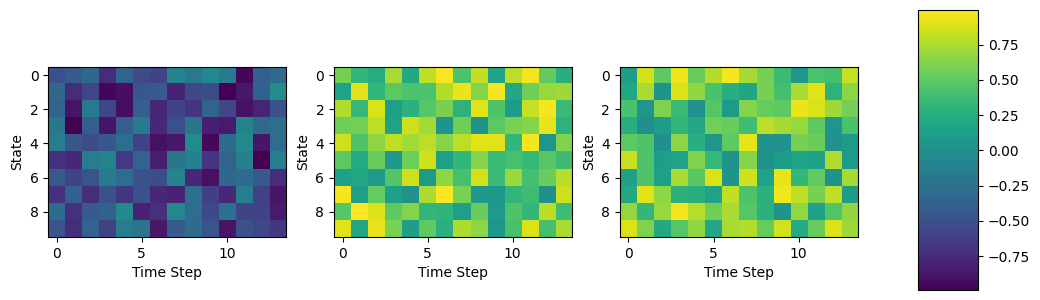

In [ ]:
# Replace the data matrices data1, data2, data3 with your data.
# the rows are the number of states you've used
# the columns are the time steps
# the values in a given column correspond to the probability of states for the given time step
# the values in a given row correspond to the probability of being in that state over time steps.

# 10 rows and 14 columns just for illustration.
# Your matrices might look different.
data1 = np.random.rand(10,14)-1
data2 = np.random.rand(10,14)
data3 = np.random.rand(10,14)

# the plotting code will take care of the plotting part.
fig = plot_data(data1,data2,data3)